In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

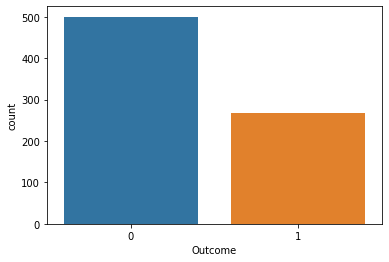

In [5]:
sns.countplot(x='Outcome', data=df)

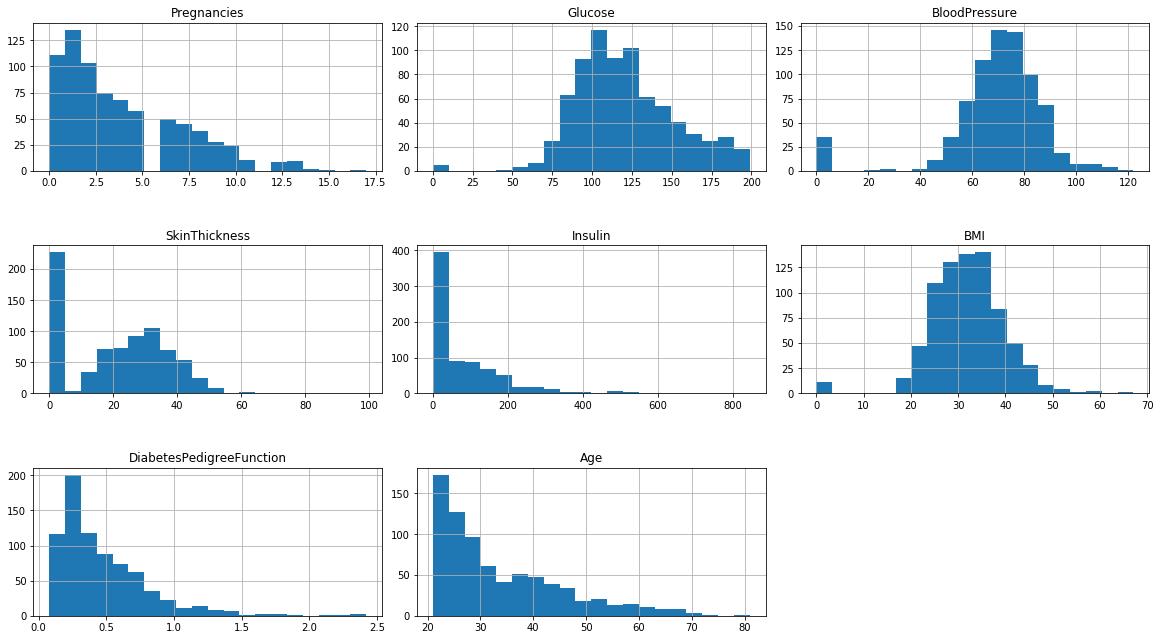

In [6]:
import itertools
col = df.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)
for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

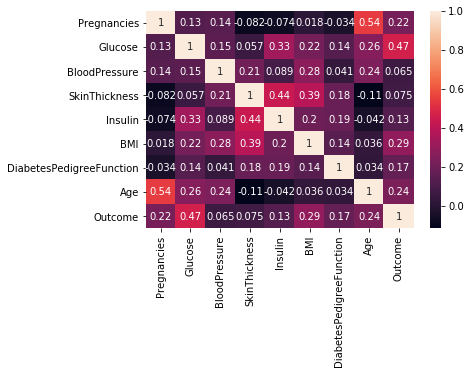

In [7]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [8]:
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [12]:
X=df.drop(['Outcome', 'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction'],axis=1)
y=df['Outcome']

In [13]:
X.head(20)

,Glucose,BloodPressure,Insulin,BMI,Age
0,148.0,72.000000,155.548223,33.600000,50
1,85.0,66.000000,155.548223,26.600000,31
2,183.0,64.000000,155.548223,23.300000,32
3,89.0,66.000000,94.000000,28.100000,21
4,137.0,40.000000,168.000000,43.100000,33
5,116.0,74.000000,155.548223,25.600000,30
6,78.0,50.000000,88.000000,31.000000,26
7,115.0,72.405184,155.548223,35.300000,29
8,197.0,70.000000,543.000000,30.500000,53
9,125.0,96.000000,155.548223,32.457464,54


In [14]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range = (0, 1))
X = mms.fit_transform(X)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()

In [16]:
X=ss.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [19]:
dc = DecisionTreeClassifier()
rc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
knnc = KNeighborsClassifier()

In [20]:
from scipy.stats import uniform as sp_rand
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

hyperparameters = dict(solver=solver, alpha=sp_rand())

In [42]:
ran_cv = RandomizedSearchCV(ridge, hyperparameters, cv = 5)

In [43]:
ran_cv.fit(X, y)
print("Tuned Decision Tree Parameters: {}".format(ran_cv.best_params_))
print("Best score is {}".format(ran_cv.best_score_))

Tuned Decision Tree Parameters: {'alpha': 0.8909871718014194, 'solver': 'svd'}
Best score is 0.27610403040180415


In [21]:
classifiers = [('Decision Tree Classifier', dc),
              ('Random Forest Classifier', rc),
              ('KNeighbors Classifier', knnc),
             ('Ada Boost Classifier', abc),
             ('Gradient Boosting Classifier', gbc)]

In [25]:
for reg_name, reg in classifiers:
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    #y_pred = y_pred.reshape(-1,1)
    print(reg_name, accuracy_score(y_test, y_pred))

Decision Tree Classifier 0.7083333333333334
Random Forest Classifier 0.7708333333333334
KNeighbors Classifier 0.7552083333333334
Ada Boost Classifier 0.7604166666666666
Gradient Boosting Classifier 0.7760416666666666


In [27]:
import pickle
diabetes_model = "diabetes_model.pkl"  
with open(diabetes_model, 'wb') as file:  
    pickle.dump(rc, file)

In [28]:
model = pickle.load(open('diabetes_model.pkl','rb'))

In [39]:
model.predict([[0,0,0,0,0]])

array([0], dtype=int64)